<a href="https://colab.research.google.com/github/prateeksab/housingprices/blob/main/Master_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from github into collab for analysis

In [190]:
!git clone https://github.com/prateeksab/housingprices.git
%cd housingprices/Data
%ls

Cloning into 'housingprices'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 64 (delta 30), reused 15 (delta 4), pack-reused 0
Unpacking objects: 100% (64/64), done.
/content/housingprices/Data/housingprices/Data/housingprices/Data
Ames_data_8_4_21.csv      AmesHousing.csv         sample_submission.csv
AmesDummyData_8_4_21.csv  AmesHousing_update.csv  test.csv
AmesDummyData.csv         data_description.txt    train.csv


# Loading all the libraries

In [191]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [192]:
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
#df = pd.concat([df_test,df_train])
df = df_train

In [193]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              7903.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:36:29   Log-Likelihood:                         -18518.
No. Observations:                1460   AIC:                                  3.704e+04
Df Residuals:                    1459   BIC:                                  3.704e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
YearBuilt     92.0802      1.036     88.899      0.000      90.048      94.112
==============================================================================
Omnibus:                      635.651   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3819.687
Skew:                           1.947   Prob(JB):                         0.00
Kurtosis:                       9.902   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

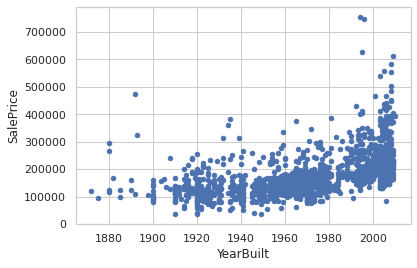

In [194]:
# Explore relation between SalePrice and YearBuilt
df.plot.scatter(x='YearBuilt',y='SalePrice')
X=df['YearBuilt']
y=df['SalePrice']
mod_price_vs_yearbuilt=sm.OLS(endog=y,exog=X).fit()
mod_price_vs_yearbuilt.summary()


Positive relationship between SalesPrice and YearBuilt

In [195]:
current_year = 2021
df['afterremodelage'] = 2021 - df['YearRemodAdd']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.482
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              1356.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                   1.90e-210
Time:                        18:36:29   Log-Likelihood:                         -19395.
No. Observations:                1460   AIC:                                  3.879e+04
Df Residuals:                    1459   BIC:                                  3.880e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
afterremodelage  3295.3521     89.495     36.822      0.000    3119.800    3470.904
==============================================================================
Omnibus:                       64.534   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.327
Skew:                           0.480   Prob(JB):                     2.67e-17
Kurtosis:                       3.578   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

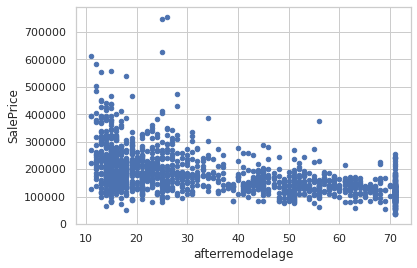

In [196]:
df.plot.scatter(x='afterremodelage',y='SalePrice')
X=df['afterremodelage']
y=df['SalePrice']
mod_price_vs_remodelage=sm.OLS(endog=y,exog=X).fit()
mod_price_vs_remodelage.summary()


# Exploring effect of neighborhood

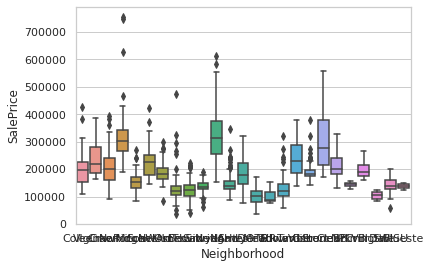

In [197]:
X = 'Neighborhood'
y= 'SalePrice'
#df.boxplot(column='SalePrice',by='Neighborhood',figsize=(30,10))
sns.set_theme(context='notebook',style='whitegrid')

ax = sns.boxplot(x=X,y=y,data=df,width=0.8, whis=1.5)

In [198]:
# Identify the most expensive neighborhoods on average
df_by_neighborhood = df.groupby(by='Neighborhood')
mean_prices_by_neighborhood = df_by_neighborhood['SalePrice'].mean()
mean_prices_by_neighborhood.sort_values(ascending=False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

In [199]:
# NoRidge, NridgHt, StoneBr have high prices. Investigate why
list_expensive_hoods = ['NoRidge','NridgHt','StoneBr']
df_expensive_hoods = df[df['Neighborhood'].isin(list_expensive_hoods)]

In [200]:
df_expensive_hoods

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,afterremodelage
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,21
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,...,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,15
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,...,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300,15
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,640.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1566,1566,GasA,...,SBrkr,1600,0,0,1600,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,890,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300,14
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,...,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274,Unf,0,256,1530,GasA,...,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,430,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000,16
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,...,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500,19
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,731.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,781,Unf,0,503,1284,GasA,...,SBrkr,1310,1140,0,2450,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.0,Fin,3,1069,TA,TA,Y,0,126,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000,23
1426,1427,60,RL,81.0,10944,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1994,1994,Gable,CompShg,VinylSd,VinylSd,Br

In [201]:
df.value_counts('Neighborhood')

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
dtype: int64

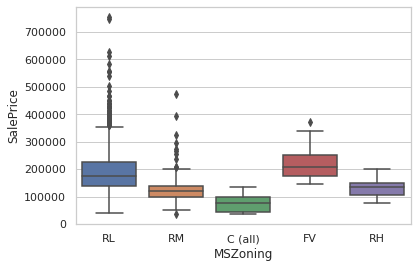

In [202]:
# Prices by each building type
X = 'MSZoning'
y= 'SalePrice'
#df.boxplot(column='SalePrice',by='Neighborhood',figsize=(30,10))
sns.set_theme(context='notebook',style='whitegrid')

ax = sns.boxplot(x=X,y=y,data=df,width=0.8, whis=1.5)

In [203]:
# Plotting a stacked bar graph
neighborhood_labels = list(df['Neighborhood'].unique())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bcef12410>]],
      dtype=object)

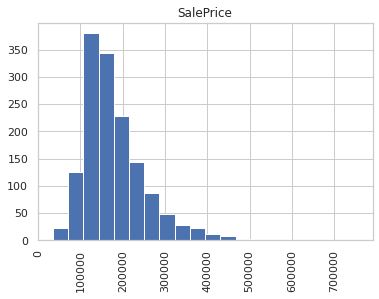

In [204]:
df.hist(column='SalePrice',bins=20,xrot=90.0)

# Explore the relationship between quality of rooms and overall quality

In [205]:
quality_features = ['OverallQual']
quality_target = ['OverallCond']

In [206]:
X = df[quality_features]
y = df[quality_target]

mod_price_vs_yearbuilt=sm.OLS(endog=y,exog=X).fit()
mod_price_vs_yearbuilt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            OverallCond   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          1.425e+04
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:36:31   Log-Likelihood:                         -2874.1
No. Observations:                1460   AIC:                                      5750.
Df Residuals:                    1459   BIC:                                      5755.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual     0.8658      0.007    119.376      0.000       0.852       0.880
==============================================================================
Omnibus:                       31.665   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.554
Skew:                           0.102   Prob(JB):                     9.35e-05
Kurtosis:                       2.487   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OverallQual and OverallCond have a strong relationship. Overall condition is determined by overall quality 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bcf251bd0>]],
      dtype=object)

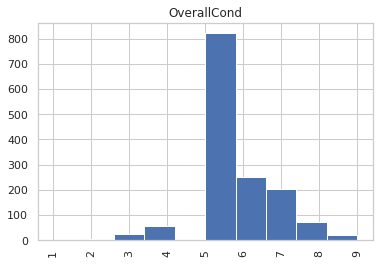

In [207]:
# Look at a histogram of overallCond

df.hist(column='OverallCond',bins=10,xrot=90.0)

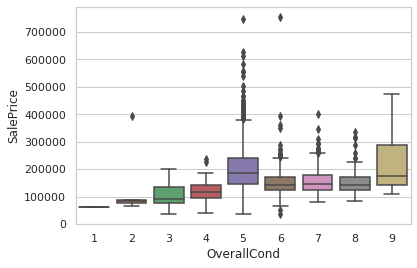

In [208]:
# Scatter plot of overall Cond and Sale Price

ax = sns.boxplot(x='OverallCond',y='SalePrice',data=df,width=0.8, whis=1.5)

Overall Condition doesn't seem to have an impact on the SalePrice

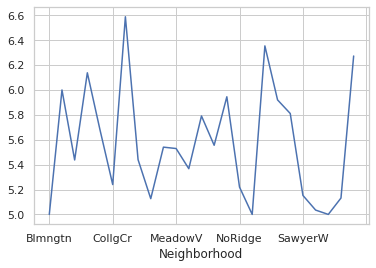

In [209]:
# Checking overall condition by neighborhood
avg = df_by_neighborhood['OverallCond'].mean()
min = df_by_neighborhood['OverallCond'].min()
avg.plot()


No clear link between neighborhoods and overallCondition of the houses

In [210]:
#quality_features = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
#                    'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical']

quality_features = ['RoofStyle']

quality_target = ['OverallCond']

qual_features_df = df[quality_features]
quality_target_df = df[quality_target]



In [211]:
qual_features_dummy_df = pd.get_dummies(qual_features_df,drop_first=True)

In [212]:
lr_model = sm.OLS(endog=quality_target_df,exog=qual_features_dummy_df).fit()
#lr_model.fit(X=qual_features_dummy_df,y=quality_target_df)

In [213]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            OverallCond   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              5855.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:36:32   Log-Likelihood:                         -2382.3
No. Observations:                1460   AIC:                                      4775.
Df Residuals:                    1455   BIC:                                      4801.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
RoofStyle_Gable       5.5732      0.037    151.912      0.000       5.501       5.645
RoofStyle_Gambrel     6.6364      0.374     17.761      0.000       5.903       7.369
RoofStyle_Hip         5.5175      0.073     75.296      0.000       5.374       5.661
RoofStyle_Mansard     6.1429      0.468     13.115      0.000       5.224       7.062
RoofStyle_Shed        5.5000      0.876      6.277      0.000       3.781       7.219
==============================================================================
Omnibus:                      459.603   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2086.305
Skew:                           1.426   Prob(JB):                         0.00
Kurtosis:                       8.115   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
quality_features = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                    'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical']

df[quality_features]

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr
1,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr
3,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr
1456,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr
1457,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr
1458,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA


In [215]:
x = df.pivot_table(values='SalePrice',index='ExterQual',columns='Exterior1st',aggfunc=np.mean)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


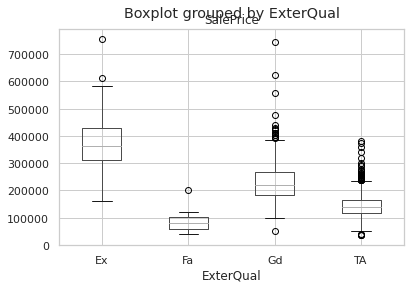

In [216]:
df.boxplot(column='SalePrice',by='ExterQual')

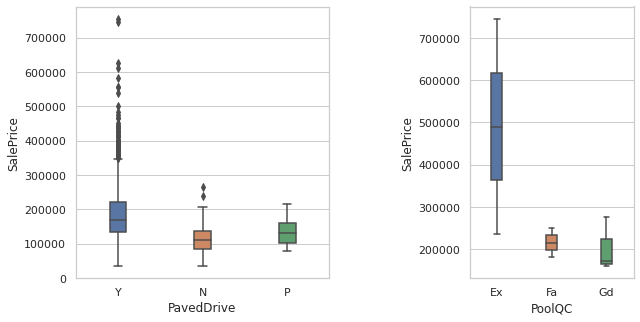

In [217]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='PavedDrive',y='SalePrice',data=df,width=0.2)
plt.subplot(1,2,2)
sns.boxplot(x='PoolQC',y='SalePrice',data=df,width=0.2)
plt.subplot(1,3,3)
sns.boxplot(x='PoolQC',y='SalePrice',data=df,width=0.2)

In [218]:
all_quality_features = ['ExterQual','BsmtQual','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageType',
                        'GarageQual','PavedDrive','PoolQC','Fence','SaleType']
all_condition_features = ['ExterCond','BsmtCond','GarageCond','SaleCondition']

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


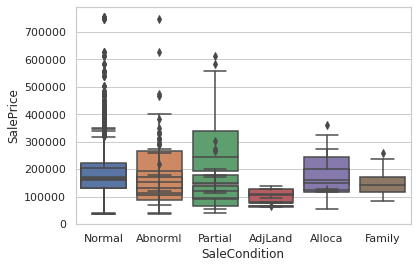

In [219]:
for feature in all_condition_features:
  ax = sns.boxplot(x=feature,y='SalePrice',data=df)
  print(ax)


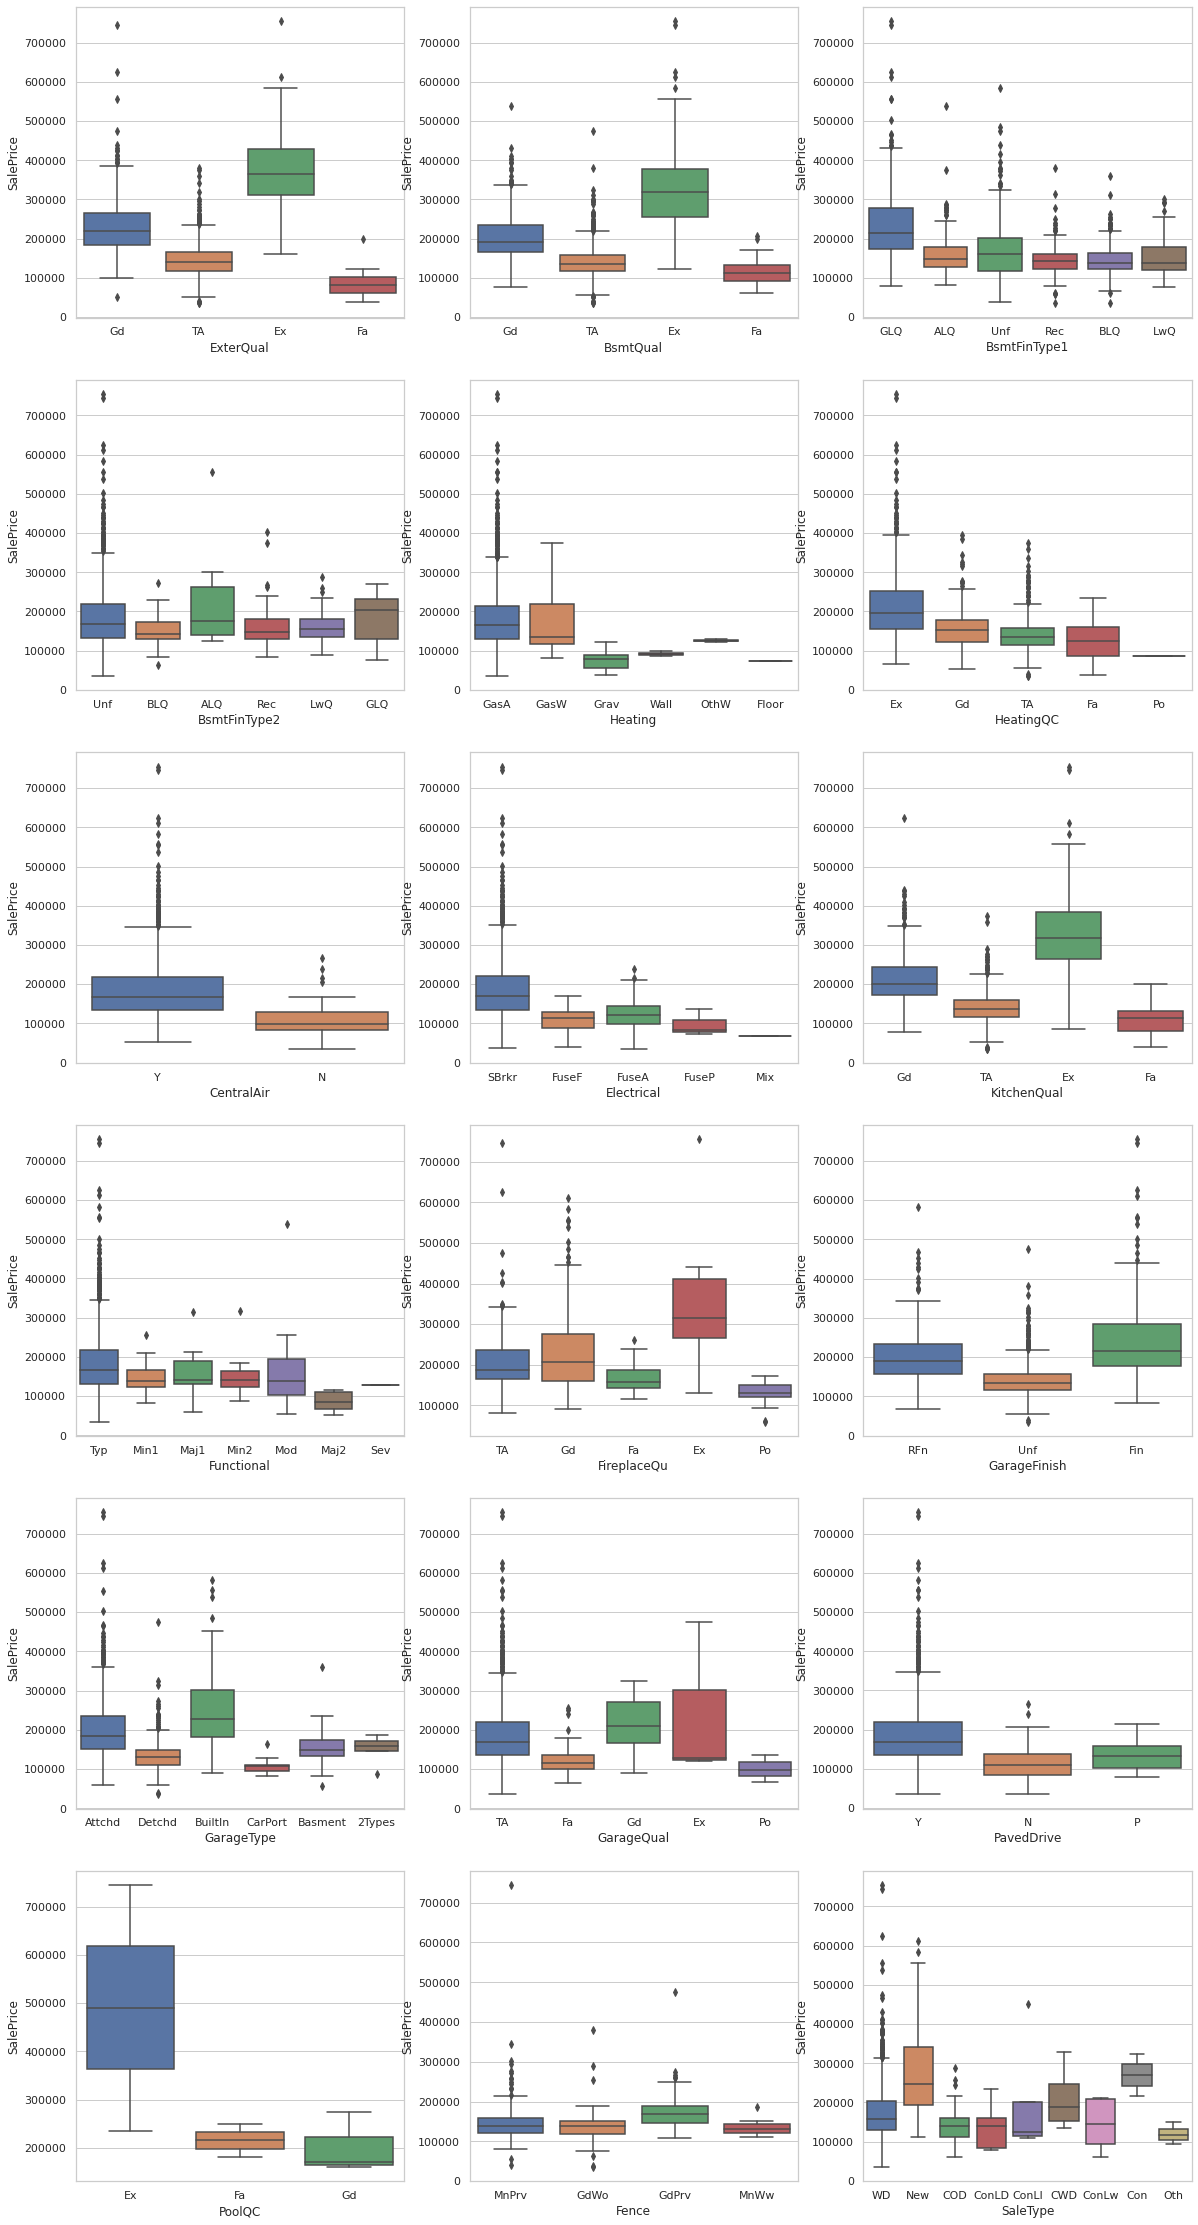

In [220]:
plt.figure(figsize=(20,40))
for i in enumerate(all_quality_features):
  plt.subplot(6,3,i[0]+1)
  sns.boxplot(x=i[1],y='SalePrice',data=df)

In [221]:
list(enumerate(all_quality_features))

[(0, 'ExterQual'),
 (1, 'BsmtQual'),
 (2, 'BsmtFinType1'),
 (3, 'BsmtFinType2'),
 (4, 'Heating'),
 (5, 'HeatingQC'),
 (6, 'CentralAir'),
 (7, 'Electrical'),
 (8, 'KitchenQual'),
 (9, 'Functional'),
 (10, 'FireplaceQu'),
 (11, 'GarageFinish'),
 (12, 'GarageType'),
 (13, 'GarageQual'),
 (14, 'PavedDrive'),
 (15, 'PoolQC'),
 (16, 'Fence'),
 (17, 'SaleType')]

In [222]:
# Quality variables with numerical scales
quality_numerical_features = ['OverallQual','OverallCond']
# Listing all columns that have ratings like good, excellent
quality_scale_features_standard = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']#,'FireplaceQu','PoolQC']
# Listing all columns that have non standard ratings
quality_scale_features_non_standard =['BsmtExposure','BsmtFinType1','BsmtFinType2','CentralAir','Electrical','Functional','GarageType','GarageFinish','PavedDrive','Fence']
# Listing columns with categorical variables
categorical_fetures = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                       'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','MiscFeature','MoSold','SaleType','SaleCondition']
# Listing columns with continuous variables
continuous_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                       'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                       'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']

In [223]:
# Mapping conditions on a scale

conditions_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
new_df = df.replace(conditions_mapping)
new_df[quality_scale_features_standard].describe()


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
count,1460.00000,1460.000000,1423.000000,1423.000000,1460.000000,1460.000000,1379.000000,1379.000000
mean,3.39589,3.083562,3.579761,3.011244,4.145205,3.511644,2.975344,2.973894
std,0.57428,0.351054,0.680602,0.287846,0.959501,0.663760,0.248598,0.239527
min,2.00000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.00000,3.000000,4.000000,3.000000,5.000000,3.000000,3.000000,3.000000
75%,4.00000,3.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000
max,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000


# Running PCA on Quality conditions

In [224]:
pca_features = quality_scale_features_standard
# Cleaning the features
cleaned_df = new_df[pca_features].fillna(0)
# Separating out the features
x = cleaned_df.loc[:, :].values 
#x = new_df.loc[:, pca_features].values
# standardizing the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [225]:
np.any(np.isnan(x))
cleaned_df.describe()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
count,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.39589,3.083562,3.489041,2.934932,4.145205,3.511644,2.810274,2.808904
std,0.57428,0.351054,0.876478,0.552159,0.959501,0.663760,0.722898,0.719685
min,2.00000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.00000,3.000000,4.000000,3.000000,5.000000,3.000000,3.000000,3.000000
75%,4.00000,3.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000
max,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000


In [226]:
#PCA Projection to 3D
pca = PCA(n_components=3)
principalComponent = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponent, columns = ['PC_1', 'PC_2','PC_3'])
principalDf

,PC_1,PC_2,PC_3
0,-1.550828,0.443439,0.578292
1,-0.121866,-0.243623,-0.313072
2,-1.550828,0.443439,0.578292
3,-0.418105,-0.229328,-1.117800
4,-1.550828,0.443439,0.578292
...,...,...,...
1455,-0.121866,-0.243623,-0.313072
1456,0.635456,-0.701035,-0.810668
1457,-2.533848,0.434315,-1.156125
1458,0.090408,-0.470202,0.177208


In [227]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [228]:
target = df['SalePrice']
model = sm.OLS(endog=df['SalePrice'],exog=principalDf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.087
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              46.36
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                    1.30e-28
Time:                        18:36:38   Log-Likelihood:                         -19808.
No. Observations:                1460   AIC:                                  3.962e+04
Df Residuals:                    1457   BIC:                                  3.964e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC_1       -3.136e+04   2797.901    -11.207      0.000   -3.68e+04   -2.59e+04
PC_2        1.042e+04   3831.084      2.719      0.007    2900.549    1.79e+04
PC_3        1.148e+04   4649.352      2.468      0.014    2355.384    2.06e+04
==============================================================================
Omnibus:                      696.740   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7462.115
Skew:                           1.952   Prob(JB):                         0.00
Kurtosis:                      13.365   Cond. No.                         1.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:

df['Log_SalePrice'] = np.log(df['SalePrice'])
target = df['Log_SalePrice']
model = sm.OLS(endog=target,exog=cleaned_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Log_SalePrice   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          3.075e+04
Date:                Sun, 08 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:36:38   Log-Likelihood:                         -1952.5
No. Observations:                1460   AIC:                                      3921.
Df Residuals:                    1452   BIC:                                      3963.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ExterQual       0.8605      0.064     13.423      0.000       0.735       0.986
ExterCond       1.7812      0.053     33.571      0.000       1.677       1.885
BsmtQual       -0.0864      0.045     -1.903      0.057      -0.176       0.003
BsmtCond        0.5801      0.058      9.973      0.000       0.466       0.694
HeatingQC       0.0978      0.030      3.209      0.001       0.038       0.158
KitchenQual     0.2700      0.055      4.932      0.000       0.163       0.377
GarageQual      0.2904      0.119      2.446      0.015       0.058       0.523
GarageCond     -0.0141      0.119     -0.118      0.906      -0.249       0.220
==============================================================================
Omnibus:                      132.958   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              855.896
Skew:                           0.046   Prob(JB):                    1.39e-186
Kurtosis:                       6.750   Cond. No.                         64.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

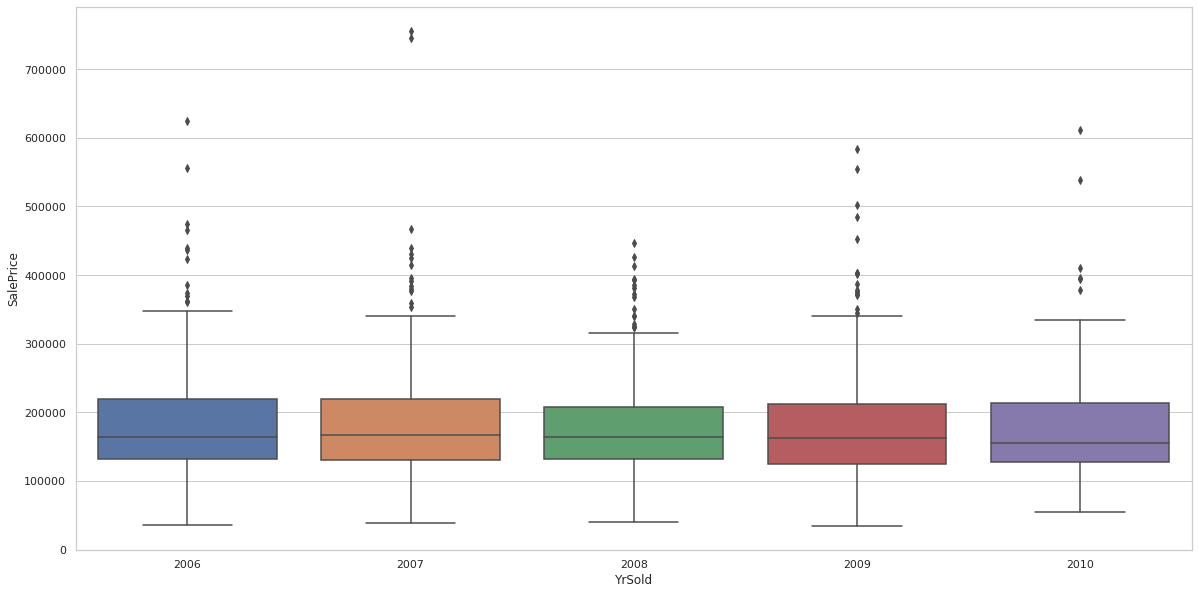

In [232]:
plt.figure(figsize=(20,10))
sns.boxplot(x='YrSold',y='SalePrice',data=df)